In [1]:
using Plots
using Dates

# Ice data plots
These plots are inspired by https://notrickszone.com/2019/06/04/climate-scientists-astounded-no-arctic-ice-loss-in-13-years-early-june-arctic-ice-growing/


## Plot the whole dataset
This plots the whole file. Play with the startdate to get an increasing trend.

In [2]:
dates = Date[]
V = Float64[]
startdate = Date("2003-01-01")
for l in eachline("IceVol.txt") # Data comes from http://ocean.dmi.dk/arctic/icethickness/txt/IceVol.txt
    if startswith(l, "%")
        continue
    end
    datestr, vol = split(l)
    date = Date(parse(Int,datestr[1:4]), parse(Int,datestr[5:6]), parse(Int,datestr[7:8]))
    if date >= startdate
        push!(dates, date)
        push!(V, parse(Float64,vol))
    end
end

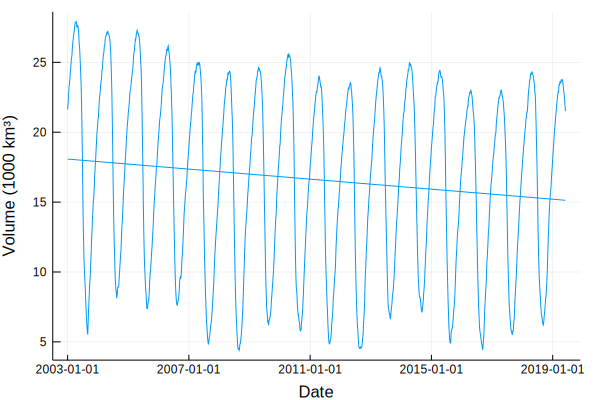

In [3]:
plot(dates,V/1000^4,xlabel="Date", ylabel="Volume (1000 km³)",legend=nothing,smooth=true)

## Plot a specific date
This plots the ice volume on a specific date, for all years in the set. Again, the trick is to adjust the starting date until you get what you want.

In [4]:
selecteddate = "0601" # Pick a date
startyear = 2003
years = Int[]
Vday = Float64[]
for l in eachline("IceVol.txt") # Data comes from http://ocean.dmi.dk/arctic/icethickness/txt/IceVol.txt
    if !startswith(l, "%")
        date, vol = split(l)
        year = parse(Int,date[1:4])
        if endswith(date, selecteddate) && year >= startyear
            push!(years, year)
            push!(Vday, parse(Float64,vol))
        end
    end
end

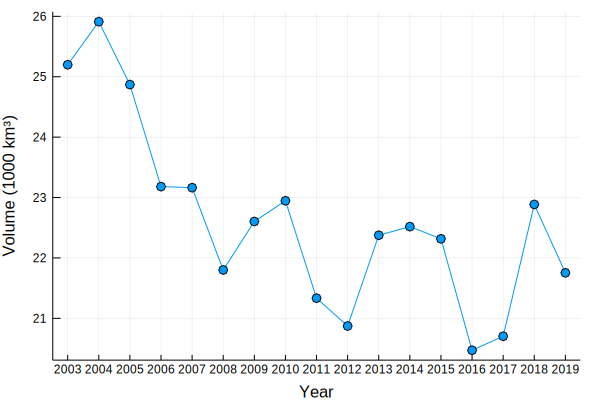

In [5]:
# plot 
plot(years,Vday/1000^4,xlabel="Year", ylabel="Volume (1000 km³)",marker=:o,legend=nothing,xticks=years)